In [47]:
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [3]:
df=pd.read_csv("bank_data.csv")
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


## Graphical exploratory data analysis

there is a positive correlation between them

<Axes: xlabel='age', ylabel='expected_recovery_amount'>

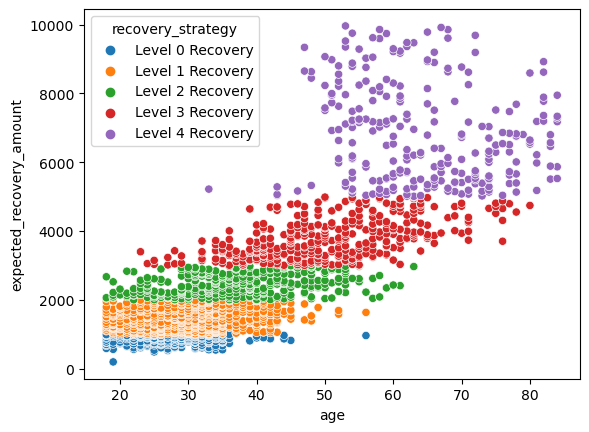

In [14]:
sns.scatterplot(x=df["age"],y=df["expected_recovery_amount"],hue=df["recovery_strategy"])


<Axes: xlabel='age', ylabel='expected_recovery_amount'>

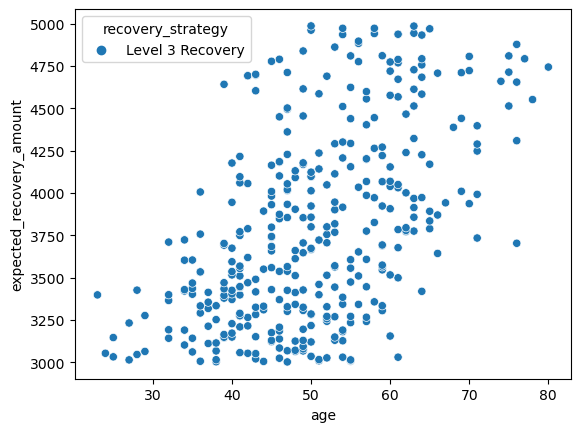

In [15]:
df_level3=df.query("recovery_strategy=='Level 3 Recovery'")
sns.scatterplot(x=df_level3["age"],y=df_level3["expected_recovery_amount"],hue=df_level3["recovery_strategy"])


<Axes: xlabel='age', ylabel='expected_recovery_amount'>

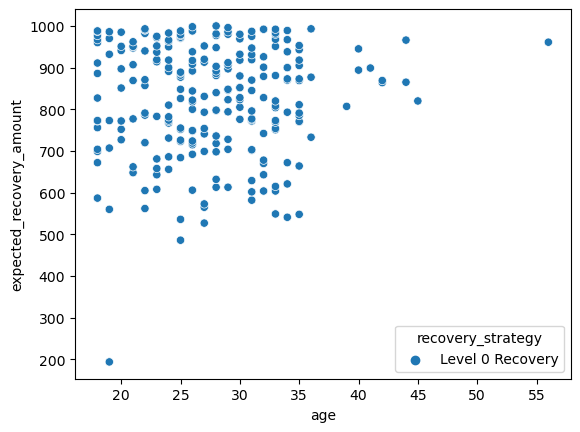

In [16]:
df_level3=df.query("recovery_strategy=='Level 0 Recovery'")
sns.scatterplot(x=df_level3["age"],y=df_level3["expected_recovery_amount"],hue=df_level3["recovery_strategy"])


In [19]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_120232\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,expected_recovery_amount,actual_recovery_amount,age
id,1.000000,-0.110098,-0.071510,-0.073001
expected_recovery_amount,-0.110098,1.000000,0.903727,0.794451
actual_recovery_amount,-0.071510,0.903727,1.000000,0.716007
age,-0.073001,0.794451,0.716007,1.000000


in level there is positive correlation between age and expected revovery amount so the levels is affected by the age

In [26]:
for i in range(5):
    print("level",i,df[df.recovery_strategy==f"Level {i} Recovery"].corr().iloc[1,3])

level 0 0.051699234257700136
level 1 0.15586278276142781
level 2 0.27513783045285395
level 3 0.5251604594095446
level 4 -0.1867268481494272


C:\Users\HP\AppData\Local\Temp\ipykernel_120232\2287312854.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("level",i,df[df.recovery_strategy==f"Level {i} Recovery"].corr().iloc[1,3])


## Statistical test: age vs. expected recovery amount

In [36]:
df.query("expected_recovery_amount>=900 and expected_recovery_amount<=1100")["age"].mean()

27.97826086956522

In [41]:
x=df.query("expected_recovery_amount>=900 and expected_recovery_amount<=1100")["sex"].value_counts()
x/x.sum()*100

Male      60.869565
Female    39.130435
Name: sex, dtype: float64

In [42]:
df.query("expected_recovery_amount>=900 and expected_recovery_amount<=1100")["actual_recovery_amount"].mean()

793.2599035902174

In [43]:
df.query("expected_recovery_amount>=950 and expected_recovery_amount<=1050")["actual_recovery_amount"].mean()

771.0911836270002

In [46]:
x = (900, 1100)
y = (950, 1050)
stats.kruskal(x, y)

KruskalResult(statistic=0.0, pvalue=1.0)

## Regression modeling: no threshold

In [49]:
x = df['expected_recovery_amount']  
y = df['actual_recovery_amount']   
x = sm.add_constant(x)

# Fit the first model (without threshold)
model = sm.OLS(y, x)
results = model.fit()

# Print the regression summary
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            14:20:46   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Regression modeling: adding true threshold

In [ ]:
df['Threshold'] = (df['expected_recovery_amount'] >= 1000).astype(int)  
x = df[['expected_recovery_amount', 'Threshold']]  
y = df['actual_recovery_amount']  

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4241.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            14:26:10   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Regression modeling: adjusting the window

In [60]:
df['Threshold'] = (df['expected_recovery_amount'] >= 950 ).astype(int)  
x = df[['expected_recovery_amount', 'Threshold']]  
y = df['actual_recovery_amount']  

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.818
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4237.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            19:16:17   Log-Likelihood:                -16927.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.388e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------